In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

# 1. Dataset

In [ ]:
# Cargamos el dataset desde el link
paises = pd.read_table('https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv')

In [ ]:
# Vemos 10 registros al azar
paises.sample(10)

,country,continent,year,lifeExp,pop,gdpPercap
393,Cuba,Americas,1997,76.15,10983007,5431.99
216,Cambodia,Asia,1952,39.42,4693836,368.47
999,Mongolia,Asia,1967,51.25,1149500,1226.04
1276,Romania,Europe,1972,69.21,20662648,8011.41
1368,Slovak Republic,Europe,1952,64.36,3558137,5074.66
1659,West Bank and Gaza,Asia,1967,51.63,1142636,2649.72
322,Comoros,Africa,2002,62.97,614382,1075.81
1136,Nigeria,Africa,1992,47.47,93364244,1619.85
1214,Philippines,Asia,1962,54.76,30325264,1649.55
1183,Panama,Americas,1987,71.52,2253639,7034.78


In [ ]:
print(f"El primer año en el dataset es {paises.year.min()} y el último año es {paises.year.max()}")

El primer año en el dataset es 1952 y el último año es 2007


El dataset contiene información de expectativa de vida, población y PBI per capita de países desde 1952 hasta 2007 en intervalos de 5 años. Vamos a trabajar con la información más reciente.

In [ ]:
# Nos quedamos con la información para el año 2007
paises_2007 = paises.query("year==2007")

Vamos a utilizar el método `pandas.describe()` para conocer las variables numéricas del dataset 

In [ ]:
paises_2007.describe()

,year,lifeExp,pop,gdpPercap
count,142.00,142.00,142.00,142.00
mean,2007.00,67.01,44021219.57,11680.07
std,0.00,12.07,147621397.90,12859.94
min,2007.00,39.61,199579.00,277.55
25%,2007.00,57.16,4508033.50,1624.84
50%,2007.00,71.94,10517531.00,6124.37
75%,2007.00,76.41,31210041.75,18008.84
max,2007.00,82.60,1318683096.00,49357.19


Vemos que hay diferencias importantes entre los valores minimos y maximos de cada variable.

También ahora podemos observar cuántos paises hay por continente. Este análisis lo podemos realizar con la función `value_counts()` o mediante `groupby(columna).size()`

In [ ]:
# Cantidad de países por continente: opción 1
paises_2007.continent.value_counts()

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: continent, dtype: int64

In [ ]:
# Cantidad de países por continente: opción 2
paises_2007.groupby('continent').size()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
dtype: int64

# 2. Discretización

Ahora que ya conocemos el dataset, nos interesa poder discretizar las variables de expectativa de vida, población y PBI per capita para agrupar a los países

## 2.1 Población

En el caso de la población nos interesa agruparlos por un criterio propio en las siguientes categorías:

* muy pequeño: hasta 1 millon de personas
* pequeño: desde 1 millon hasta 7.5 millones de personas
* mediano: desde 7.5 millones hasta 25 millones de personas
* grande: desde 25 millones hasta 100 millones de personas
* enorme: desde 100 millones

Revisemos la información del comando `pandas.cut()`

In [ ]:
# Abrimos la ayuda sobre la función
?pd.cut()

pandas.cut(x, bins, right=True, labels=None, ordered=True)

En este caso **x** es la columna de población y en **bins** le pasamos los límites que hemos definido

In [ ]:
# Definimos los limites de los intervalos
bins_poblacion = [0, 1_000_000, 7_500_000, 25_000_000, 100_000_000, np.inf]

* Usamos el guion bajo para separar los números y que sean más faciles de leer
* Usamos `np.inf` para denotar que no definimos el ĺímite superior 

In [ ]:
# Discretizamos la variable de población
pd.cut(x=paises_2007['pop'],bins=bins_poblacion)

11      (25000000.0, 100000000.0]
23         (1000000.0, 7500000.0]
35      (25000000.0, 100000000.0]
47        (7500000.0, 25000000.0]
59      (25000000.0, 100000000.0]
                  ...            
1655    (25000000.0, 100000000.0]
1667       (1000000.0, 7500000.0]
1679      (7500000.0, 25000000.0]
1691      (7500000.0, 25000000.0]
1703      (7500000.0, 25000000.0]
Name: pop, Length: 142, dtype: category
Categories (5, interval[float64]): [(0.0, 1000000.0] < (1000000.0, 7500000.0] <
                                    (7500000.0, 25000000.0] < (25000000.0, 100000000.0] <
                                    (100000000.0, inf]]

Observamos que la función nos devuelve la variable transformada y las categorías ordenadas. Para mejorar la interpretación podemos agregar los nombres en el argumento **labels**

In [ ]:
# Lista de categorías
etiquetas_poblacion =  ['muy pequeño','pequeño', 'mediano', 'grande','enorme']
# Discretizamos la variable de población
pd.cut(x=paises_2007['pop'],bins=bins_poblacion, labels=etiquetas_poblacion)

11       grande
23      pequeño
35       grande
47      mediano
59       grande
         ...   
1655     grande
1667    pequeño
1679    mediano
1691    mediano
1703    mediano
Name: pop, Length: 142, dtype: category
Categories (5, object): ['muy pequeño' < 'pequeño' < 'mediano' < 'grande' < 'enorme']

Ahora que ya tenemos nuestras categorías, podemos crear una nueva variable con la población discretizada

In [ ]:
# Discretizamos la variable de población
paises_2007['cat_poblacion'] = pd.cut(x=paises_2007.loc[:,'pop'],bins=bins_poblacion, labels=etiquetas_poblacion)

In [ ]:
# Observamos la nueva columna
paises_2007.sample(10)

,country,continent,year,lifeExp,pop,gdpPercap,cat_poblacion
863,Kuwait,Asia,2007,77.59,2505559,47306.99,pequeño
1139,Nigeria,Africa,2007,46.86,135031164,2013.98,enorme
347,"Congo, Rep.",Africa,2007,55.32,3800610,3632.56,pequeño
1067,Namibia,Africa,2007,52.91,2055080,4811.06,pequeño
203,Burkina Faso,Africa,2007,52.30,14326203,1217.03,mediano
899,Liberia,Africa,2007,45.68,3193942,414.51,pequeño
251,Canada,Americas,2007,80.65,33390141,36319.24,grande
683,Hungary,Europe,2007,73.34,9956108,18008.94,mediano
1607,United Kingdom,Europe,2007,79.42,60776238,33203.26,grande
215,Burundi,Africa,2007,49.58,8390505,430.07,mediano


## 2.2 Expectativa de vida

En el caso de la expectativa de vida nos interesa agruparlos en 5 categorías: muy baja, baja, media, alta y muy alta. Pero en este caso vamos a querer comparar los bins que surjan del método por igual frecuencia o por igual ancho.

### 2.2.1 Intervalos de igual ancho

Para crear intervalos de igual ancho tenemos que utilizar la función `pandas.cut()`. En este caso le pasamos la cantidad de bins que queremos, 5, al argumento **bins**

In [ ]:
# Discretizamos la variable de expectativa de vida
pd.cut(x=paises_2007.lifeExp, bins=5)

11       (39.57, 48.211]
23      (74.005, 82.603]
35      (65.407, 74.005]
47       (39.57, 48.211]
59      (74.005, 82.603]
              ...       
1655    (74.005, 82.603]
1667    (65.407, 74.005]
1679    (56.809, 65.407]
1691     (39.57, 48.211]
1703     (39.57, 48.211]
Name: lifeExp, Length: 142, dtype: category
Categories (5, interval[float64]): [(39.57, 48.211] < (48.211, 56.809] < (56.809, 65.407] <
                                    (65.407, 74.005] < (74.005, 82.603]]

In [ ]:
# Guardamos los bins para comparar 
_ , bins_igual_ancho = pd.cut(x=paises_2007.lifeExp, bins=5, retbins=True)

### 2.2.2 Intervalos de igual frecuencia

Para crear intervalos de igual ancho tenemos que utilizar la función `pandas.qcut()`. En este caso le pasamos la cantidad de bins que queremos, 5, al argumento **q**

In [ ]:
# Abrimos la ayuda sobre la función
? pd.qcut()

In [ ]:
# Discretizamos la variable de expectativa de vida
pd.qcut(x=paises_2007.lifeExp, q=5)

11      (39.612, 54.181]
23      (73.205, 78.267]
35      (67.001, 73.205]
47      (39.612, 54.181]
59      (73.205, 78.267]
              ...       
1655    (73.205, 78.267]
1667    (73.205, 78.267]
1679    (54.181, 67.001]
1691    (39.612, 54.181]
1703    (39.612, 54.181]
Name: lifeExp, Length: 142, dtype: category
Categories (5, interval[float64]): [(39.612, 54.181] < (54.181, 67.001] < (67.001, 73.205] <
                                    (73.205, 78.267] < (78.267, 82.603]]

In [ ]:
# Guardamos los bins para comparar 
_ , bins_igual_frecuencia = pd.qcut(x=paises_2007.lifeExp, q=5, retbins=True)

### 2.2.3 Comparación de los dos métodos

In [ ]:
# Bins de igual ancho
bins_igual_ancho

array([39.57001, 48.211  , 56.809  , 65.407  , 74.005  , 82.603  ])

In [ ]:
# Bins de igual frecuencia
bins_igual_frecuencia

array([39.613 , 54.1814, 67.0006, 73.2048, 78.2668, 82.603 ])

Los intervalos de igual ancho se encuentran definidos por aproximadamente 8.5 años pero tienen una cantidad variable de paises. 

Los intervalos de igual frecuencia (en este caso quintiles) tienen una longitud variable, pero en cada uno de ellos se encuentra aproximadamente el 20% de los países

In [ ]:
# Categorías expectativa de vida
etiquetas_exp_vida = ['muy_baja', 'baja', 'media', 'alta', 'muy_alta']
# Vamos a crear una variable nueva para cada tipo de discretizacion
paises_2007['cat_exp_vida_ancho'] = pd.cut(x=paises_2007['lifeExp'], bins=5, labels=etiquetas_exp_vida)
paises_2007['cat_exp_vida_frec'] = pd.qcut(x=paises_2007['lifeExp'], q=5, labels=etiquetas_exp_vida)

In [ ]:
# Observemos nuestros datos
paises_2007.sample(10)

,country,continent,year,lifeExp,pop,gdpPercap,cat_poblacion,cat_exp_vida_ancho,cat_exp_vida_frec
1091,Netherlands,Europe,2007,79.76,16570613,36797.93,mediano,muy_alta,muy_alta
1679,"Yemen, Rep.",Asia,2007,62.70,22211743,2280.77,mediano,media,baja
83,Austria,Europe,2007,79.83,8199783,36126.49,mediano,muy_alta,muy_alta
851,"Korea, Rep.",Asia,2007,78.62,49044790,23348.14,grande,muy_alta,muy_alta
1043,Mozambique,Africa,2007,42.08,19951656,823.69,mediano,muy_baja,muy_baja
59,Argentina,Americas,2007,75.32,40301927,12779.38,grande,muy_alta,alta
143,Bolivia,Americas,2007,65.55,9119152,3822.14,mediano,alta,baja
959,Mali,Africa,2007,54.47,12031795,1042.58,mediano,baja,baja
131,Benin,Africa,2007,56.73,8078314,1441.28,mediano,baja,baja
731,Iran,Asia,2007,70.96,69453570,11605.71,grande,alta,media


## 2.3 PBI per capita

En el caso de esta variable nos interesa probar cual es el resultado de utilizar alguno de los métodos de la función `numpy.histogram()`

In [ ]:
# Abrimos la ayuda sobre la función
?np.histogram()

La función `numpy.histogram()` nos devuelve dos elementos:

* La lista con la cantidad de elementos en cada bin
* Los límites de los intervalos

In [ ]:
# Calculamos los bins con el método de Sturges
np.histogram(paises_2007.gdpPercap, bins='sturges')

(array([69, 24, 12,  6,  7,  7, 11,  3,  3]),
 array([  277.5518587,  5730.8450044, 11184.1381501, 16637.4312958,
        22090.7244415, 27544.0175872, 32997.3107329, 38450.6038786,
        43903.8970243, 49357.19017  ]))

In [ ]:
# Guardamos la información en dos variables
elementos, limites_pbi = np.histogram(paises_2007.gdpPercap, bins='sturges')

In [ ]:
print(f"El histograma cuenta con {len(elementos)} intervalos")

El histograma cuenta con 9 intervalos


In [ ]:
# Para crear la variable discretizada le pasamos la lista de limites a pd.cut()
pd.cut(x=paises_2007.gdpPercap, bins=limites_pbi)

11         (277.552, 5730.845]
23       (5730.845, 11184.138]
35       (5730.845, 11184.138]
47         (277.552, 5730.845]
59      (11184.138, 16637.431]
                 ...          
1655       (277.552, 5730.845]
1667       (277.552, 5730.845]
1679       (277.552, 5730.845]
1691       (277.552, 5730.845]
1703       (277.552, 5730.845]
Name: gdpPercap, Length: 142, dtype: category
Categories (9, interval[float64]): [(277.552, 5730.845] < (5730.845, 11184.138] <
                                    (11184.138, 16637.431] < (16637.431, 22090.724] < ... <
                                    (27544.018, 32997.311] < (32997.311, 38450.604] <
                                    (38450.604, 43903.897] < (43903.897, 49357.19]]

In [ ]:
# Para facilitar la interpretación generamos etiquetas
pd.cut(x=paises_2007.gdpPercap, bins=limites_pbi, labels=range(1,10))

11      1
23      2
35      2
47      1
59      3
       ..
1655    1
1667    1
1679    1
1691    1
1703    1
Name: gdpPercap, Length: 142, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

In [ ]:
# Creamos la nueva variable discretizada
paises_2007['cat_pbi_per_cap'] = pd.cut(x=paises_2007.gdpPercap, bins=limites_pbi, labels=range(1,10))

In [ ]:
# Veamos como luce nuestro dataset final
paises_2007.sample(10)

,country,continent,year,lifeExp,pop,gdpPercap,cat_poblacion,cat_exp_vida_ancho,cat_exp_vida_frec,cat_pbi_per_cap
695,Iceland,Europe,2007,81.76,301931,36180.79,muy pequeño,muy_alta,muy_alta,7
383,Croatia,Europe,2007,75.75,4493312,14619.22,pequeño,muy_alta,alta,3
347,"Congo, Rep.",Africa,2007,55.32,3800610,3632.56,pequeño,baja,baja,1
419,Denmark,Europe,2007,78.33,5468120,35278.42,pequeño,muy_alta,muy_alta,7
791,Jamaica,Americas,2007,72.57,2780132,7320.88,pequeño,alta,media,2
623,Guinea,Africa,2007,56.01,9947814,942.65,mediano,baja,baja,1
83,Austria,Europe,2007,79.83,8199783,36126.49,mediano,muy_alta,muy_alta,7
1283,Romania,Europe,2007,72.48,22276056,10808.48,mediano,alta,media,2
359,Costa Rica,Americas,2007,78.78,4133884,9645.06,pequeño,muy_alta,muy_alta,2
1703,Zimbabwe,Africa,2007,43.49,12311143,469.71,mediano,muy_baja,muy_baja,1


# 3 Análisis de las variables discretizadas

Veamos cuantos países están en las nuevas categorías y algunos gráficos sencillos

In [ ]:
#¿Cuántos países hay en cada categoría de población?
paises_2007.groupby('cat_poblacion').size()

cat_poblacion
muy pequeño     8
pequeño        46
mediano        46
grande         32
enorme         10
dtype: int64

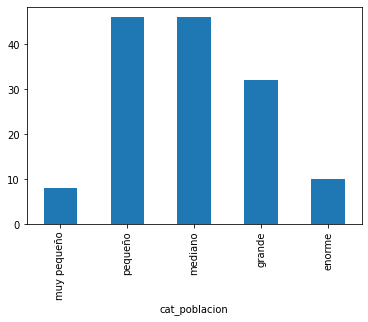

In [ ]:
paises_2007.groupby('cat_poblacion').size().plot.bar()

In [ ]:
#¿Cuántos países hay en cada categoría de población en cada continente?
paises_2007.groupby(['continent','cat_poblacion']).size()

continent  cat_poblacion
Africa     muy pequeño       5
           pequeño          16
           mediano          20
           grande           10
           enorme            1
Americas   muy pequeño       0
           pequeño          10
           mediano           7
           grande            5
           enorme            3
Asia       muy pequeño       1
           pequeño           9
           mediano           7
           grande           10
           enorme            6
Europe     muy pequeño       2
           pequeño          10
           mediano          11
           grande            7
           enorme            0
Oceania    muy pequeño       0
           pequeño           1
           mediano           1
           grande            0
           enorme            0
dtype: int64

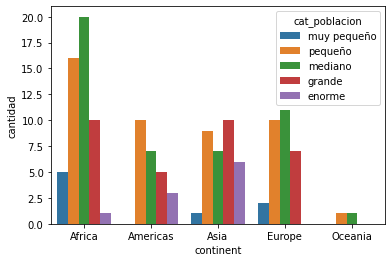

In [ ]:
# Graficamos
cantidad_pob_cont = paises_2007.groupby(['continent','cat_poblacion']).agg(cantidad=('country', 'count')).reset_index()
sns.barplot(x='continent', y='cantidad', hue='cat_poblacion', data=cantidad_pob_cont)

In [ ]:
# ¿Cuántos países hay para las categorias de esperanza de vida de igual ancho?
paises_2007.groupby('cat_exp_vida_ancho').size()

cat_exp_vida_ancho
muy_baja    15
baja        20
media       18
alta        38
muy_alta    51
dtype: int64

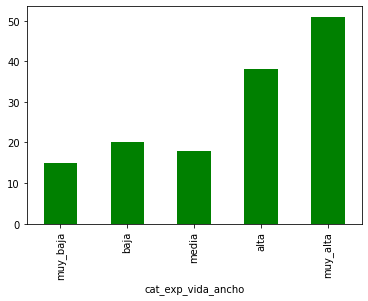

In [ ]:
paises_2007.groupby('cat_exp_vida_ancho').size().plot.bar(color='green')

In [ ]:
# ¿Cuántos países hay para las categorias de esperanza de vida de igual frecuencia?
paises_2007.groupby('cat_exp_vida_frec').size()

cat_exp_vida_frec
muy_baja    29
baja        28
media       28
alta        28
muy_alta    29
dtype: int64

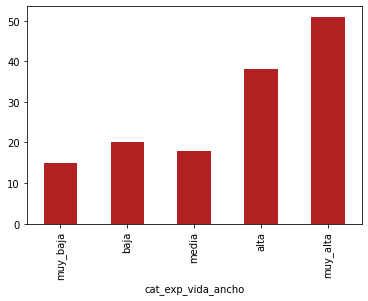

In [ ]:
paises_2007.groupby('cat_exp_vida_ancho').size().plot.bar(color='firebrick')

In [ ]:
#¿Cuántos países hay para las categorías de pbi per capita y esperanza de vida?
paises_2007.groupby(['cat_exp_vida_frec', 'cat_pbi_per_cap']).size()

cat_exp_vida_frec  cat_pbi_per_cap
muy_baja           1                  25
                   2                   1
                   3                   2
                   4                   0
                   5                   0
                   6                   0
                   7                   0
                   8                   0
                   9                   0
baja               1                  27
                   2                   0
                   3                   1
                   4                   0
                   5                   0
                   6                   0
                   7                   0
                   8                   0
                   9                   0
media              1                  13
                   2                  12
                   3                   1
                   4                   2
                   5                   0
                   6  

In [ ]:
#Veamos los paises que tiene expectativa muy alto con bajos ingresos

In [ ]:
paises_2007.query('cat_exp_vida_ancho == "muy_alta" and cat_pbi_per_cap <= 3')

,country,continent,year,lifeExp,pop,gdpPercap,cat_poblacion,cat_exp_vida_ancho,cat_exp_vida_frec,cat_pbi_per_cap
287,Chile,Americas,2007,78.55,16284741,13171.64,mediano,muy_alta,muy_alta,3
359,Costa Rica,Americas,2007,78.78,4133884,9645.06,pequeño,muy_alta,muy_alta,2
395,Cuba,Americas,2007,78.27,11416987,8948.10,mediano,muy_alta,muy_alta,2
1259,Puerto Rico,Americas,2007,78.75,3942491,19328.71,pequeño,muy_alta,muy_alta,4
